# Kickstarter Foundational Data Analysis
Kickstarter, the crowdfunding platform, is thinking about providing a consulting service to project founders to help its customers create more successful crowdfunding campaigns. You’ve been asked to do some initial analysis. 

In order to complete this assignment, please follow the link and download the following Kickstarter dataset: http://bit.ly/2cgMGDm. Use the dataset to complete this task.

Below I will use Python and some libraries for the task! Let's begin.

## 1. Downloaded Data
I downloaded the data manually via link but not let's bring it into our ```./data``` directory!

In [9]:
# Our working directory
!pwd

/Users/diegomedina-bernal/Desktop/MadGeniusLearning/GA_DataScience/DSI_01


In [14]:
# let's now move from desktop to here!
file_path = '../../../DSI_kickstarterscrape_dataset.csv'
new_path = './data'

# moving our file
!mv {file_path} {new_path}

In [15]:
# checking if its there
!ls ./data/

DSI_kickstarterscrape_dataset.csv


## 2. Exploring Data
For our data exploring task we will use ```Pandas```. From here on out we will refer to this kickstarter file as ```DSI_*```

In [12]:
import pandas as pd
import os
import time

In [17]:
# setting new file path
DSI_path = './data/DSI_kickstarterscrape_dataset.csv'

# using CSV Load: Will transform into Pandas DataFrame object
DSI_DF = pd.read_csv(DSI_path, encoding='ISO-8859-1')

In [19]:
DSI_DF.head(3)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00


In [20]:
DSI_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
project id           45957 non-null int64
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.0+ MB


## 3. Data Analysis
Now that we have imported without any errors let's begin our Data Analysis task. We will be using Matplotlib & Seaborn for Histogram analysis and will also import ```NumPy```!

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)

%matplotlib inline

### A. What is the mean (total) pledge that projects get?
We will look at our ```pledged``` column and calculate the mean with Pandas (optimized). We could write our own function.

In [23]:
# Creating a pledged series from our DF.
pledged = DSI_DF['pledged'].copy()

In [27]:
# calculate our mean
pledged.mean()

4980.749678963979

In [192]:
def find_mean(arr):
    """
    Loops through an array adding each element and dividing by the length!
    ARGS:
        arr: <Array: INT/FLOAT>
        
    RETURNS:
        mean: <INT> 
    """
    # what is the length of this array?
    array_length = len(arr)
    
    # keeping track of sum
    sum_ = 0
    
    # looping through the array
    for i in range(array_length):
        
        if isinstance(arr[i], float):
            sum_ += int(arr[i])
        else:
            pass
        
    mean = sum_ / array_length
    
    return mean

In [193]:
# converting our pledge amounts to a python list
pledged.dropna(inplace=True) # dropping null values
pledged_list = pledged.tolist()

In [194]:
mean = find_mean(pledged_list)
mean

4980.749678963979

#### Why use pandas?
Let's check the speed

In [195]:
# creating a function to grab both pledged amounts and pledged list
def get_pledged():
    """
    Will return two datasets, one will be the pandas series, the other will be the list without any null values
    """
    pledged = DSI_DF['pledged'].copy()
    pledged_list_pre = DSI_DF['pledged'].copy()
    pledged_list_pre.dropna(inplace=True)
    pledged_list = pledged_list.tolist()
    
    return pledged, pledged_list

In [197]:
%timeit -n 10 pledged.mean()

91.7 µs ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [198]:
%timeit -n 10 _, find_mean(pledged_list)

14.6 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


As you can see, much much slower

### B. Create a histogram that shows the distribution for number of backers. What is the skew of the distribution?

In [142]:
# grabbing backers
backers = DSI_DF['backers'].copy()
backers_ = backers.copy()

# dropping any null values
backers_.dropna(inplace=True)

In [176]:
backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

In [144]:
assert len(backers)==len(backers_)

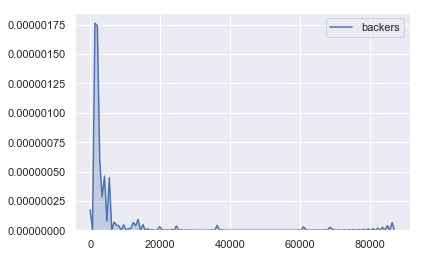

In [149]:
sns.kdeplot(backers, shade=True)

In [155]:
backers.sort_values(ascending=False).head(10)

41151    87142
10710    68929
42674    61290
11231    36276
17468    24883
38386    20042
4086     14952
44587    14081
27726    13647
4114     13512
Name: backers, dtype: int64

In [158]:
top_10 = backers.sort_values(ascending=False).head(10).index

In [162]:
top_10_df = DSI_DF.iloc[top_10.to_list()]

In [166]:
# showing top 3 backers
top_10_df.head(3)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
41151,1929840910,Double Fine Adventure,http://www.kickstarter.com/projects/doublefine...,Games,Video Games,"San Francisco, CA",successful,400000.0,3336372.0,8.340930,87142,"Wed, 14 Mar 2012 00:00:00 -0000",9,"$15,$30,$60,$100,$250,$500,$1,000,$5,000,$10,000",9,10159,33.92
10710,506924864,Pebble: E-Paper Watch for iPhone and Android,http://www.kickstarter.com/projects/597507018/...,Design,Product Design,"Palo Alto, CA",successful,100000.0,10266845.0,102.668457,68929,"Sat, 19 May 2012 03:00:00 -0000",11,"$1,$99,$115,$125,$220,$235,$240,$550,$1,000,$1...",13,7013,37.92
42674,2000827215,Wasteland 2,http://www.kickstarter.com/projects/inxile/was...,Games,Video Games,"Newport Beach, CA",successful,900000.0,2933252.0,3.259169,61290,"Tue, 17 Apr 2012 12:05:42 -0000",15,"$15,$30,$50,$55,$75,$100,$150,$150,$250,$500,$...",16,13133,35.00


The answer is that the ```backers``` data is **right-skewed** in that is doesn't follow a **symetrical distribution**. We also noted at the top 3 have over 30,000 backers while the rest back less than 24,000 with the max being 87,000. 

### C. Is the 'duration' variable normally distributed?

In [184]:
# let's first look at a normal distribution
normal_dist = np.random.normal(size=len(DSI_DF['duration']))

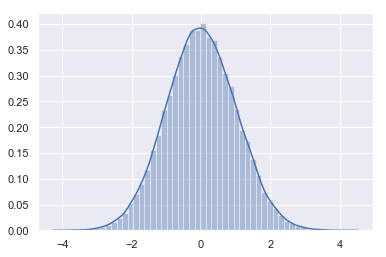

In [185]:
# what normal distribution looks like: using the size of our dataframe
sns.distplot(normal_dist)

In [186]:
# creating a duration series
duration = DSI_DF['duration'].copy()

In [190]:
# any null values?
assert duration.isnull().any()==False

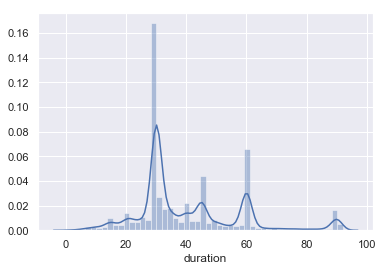

In [191]:
# checking the distribution
sns.distplot(duration)

### D. If you could collect data on another attribute of these projects, what would it be and why? 
My answer may be very biased from my work. I would argue the more data and meta-data the better. The goal: I would want to develop a report or perhaps a web-app that provides guidance to those who want to use kickstarter! My approach would be to use Deep Learning to do just that. However, for this project; the first thing that comes to mind is mining and retrieving any meta-data regarding the creator of the project. Such data includes: their social media, how many followers? Did they do social media advertising? If so, what type of social media advertising? How many people did they reach? Other type of meta-data I would want to collect is meta-data about the backers. Where do they fall? What are their taste and likes? 

If I had such meta-data I could build a web-app and provide some Deep Learning Intuition to the user. Otherwise, based on the category and sub-category of their project we may (in this case) provide our statistical findings. 

Why more data? Neural Networks are awesome and with the right configuration and training methods you can model high-dimensional complex non-linearities. The key is starting with a high-complexity model until you overfit. Then introduce generalization techiques from: Gathering more data, data augmentation, network regularization (Weight Decay, Dropout, Momemtum, etc). Finally, reducing network complexity. 